In [1]:
# First, we're importing all the necessary libraries. These are like our toolbox for data analysis and machine learning.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Now, let's load our dataset. We're using a CSV file that was originally an Excel sheet about excavation data.

file_path = "/mnt/data/dataset_excavate.xlsx - Sheet 1.csv"
df = pd.read_csv("/content/dataset_excavate.xlsx - Sheet 1.csv")

# We need to figure out which columns contain text (non-numeric data). This is
# important because we'll need to handle these differently.

non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

# For our machine learning model to work, we need all data to be numeric. So, we're going to convert all our text columns into numbers using a technique called Label Encoding.

label_encoders = {}

for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # We're saving these encoders for later, just in case we need to reverse the process.

# Data can sometimes have missing values. We're filling those gaps with the median value of each column to keep our dataset complete.

df.fillna(df.median(numeric_only=True), inplace=True)

# Now, we're setting up our data for a classification task. We want to predict if a material is an insulator or not based on its properties.

X_class = df.drop(columns=['PBE band gap'])  # These are our features - all columns except the band gap.
y_class = (df['PBE band gap'] >= 0.5).astype(int)  # This is our target - 1 if it's an insulator, 0 if it's not.

# We're splitting our data into training and testing sets. This helps us evaluate how well our model performs on unseen data.

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Finally, we're standardizing our features. This puts all our data on the same scale, which can help our model perform better.

scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# We're all set! Our data is processed and ready for model training.

print("✅ Dataset successfully processed and ready for model training!")
print(f"Training Samples: {len(X_train_class)}, Testing Samples: {len(X_test_class)}")


Non-numeric columns: ['functional group', 'A', "A'", 'Bi', "B'"]
✅ Dataset successfully processed and ready for model training!
Training Samples: 4121, Testing Samples: 1031


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Let's create our forest of decision trees!
# We're using 100 trees and setting a random state for reproducibility
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Time to teach our forest! We're feeding it our training data
clf.fit(X_train_class, y_train_class)

# Now, let's see how well our forest can predict on new data
y_pred_class = clf.predict(X_test_class)

# How accurate is our forest? Let's find out!
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Classification Model Accuracy:", accuracy)

# Let's get a detailed report card for our forest's performance
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Classification Model Accuracy: 0.9175557710960233

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       715
           1       0.92      0.80      0.86       316

    accuracy                           0.92      1031
   macro avg       0.92      0.88      0.90      1031
weighted avg       0.92      0.92      0.92      1031



In [3]:
# Let's focus on the insulators - materials with a decent band gap
# We're considering anything with a PBE band gap of 0.5 eV or more
df_insulators = df[df['PBE band gap'] >= 0.5]

# Time to set up our prediction game!
# We'll use all columns except 'PBE band gap' to predict the band gap
X_reg = df_insulators.drop(columns=['PBE band gap'])  # These are our clues
y_reg = df_insulators['PBE band gap']  # This is what we're trying to guess

# Let's split our data into training and testing sets
# We'll use 80% for training and keep 20% to test our predictions later
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Now, let's make sure all our features are on the same scale
# This helps our model learn more effectively
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Let's grow a forest of decision trees for continuous value predictions!
# Using 100 trees and setting a fixed random state for consistent results
reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train our forest to predict band gaps using our prepared training data
reg.fit(X_train_reg, y_train_reg)

# Time to test our forest's prediction skills on new unseen data
y_pred_reg = reg.predict(X_test_reg)

# Let's check how close our predictions are to reality
mae = mean_absolute_error(y_test_reg, y_pred_reg)  # Average prediction error
mse = mean_squared_error(y_test_reg, y_pred_reg)   # Squared error (punishes big mistakes more)

# Showcasing our model's report card
print("Regression Model Performance:")
print("Mean Absolute Error (MAE):", mae)  # "How far off are we typically?"
print("Mean Squared Error (MSE):", mse)   # "How big are our worst mistakes?"


Regression Model Performance:
Mean Absolute Error (MAE): 0.24240094936708867
Mean Squared Error (MSE): 0.14866450224683547


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


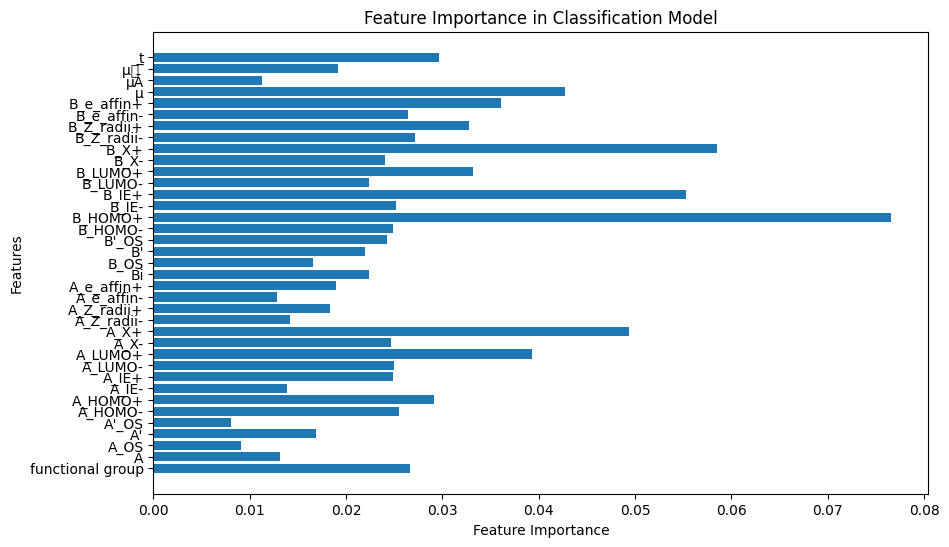

In [5]:
import matplotlib.pyplot as plt

# Let's find out which features matter the most in our classification model!
# The RandomForestClassifier has a built-in method to calculate feature importance
importances = clf.feature_importances_  # This gives us a score for each feature
feature_names = X_class.columns  # These are the names of the features we used

# Time to visualize the importance of each feature in our model's decision-making process
plt.figure(figsize=(10, 6))  # Set up a nice-sized canvas for our plot
plt.barh(feature_names, importances)  # Create a horizontal bar chart to display feature importance
plt.xlabel("Feature Importance")  # Label for the x-axis (importance scores)
plt.ylabel("Features")  # Label for the y-axis (feature names)
plt.title("Feature Importance in Classification Model")  # Add a title to explain what we're showing
plt.show()  # Display the plot!


In [6]:
import joblib
joblib.dump(clf, "classification_model.pkl")
joblib.dump(reg, "regression_model.pkl")


['regression_model.pkl']

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = clf.predict(X_test_class)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Classification Model Accuracy:", accuracy)

# Display detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Classification Model Accuracy: 0.9175557710960233

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       715
           1       0.92      0.80      0.86       316

    accuracy                           0.92      1031
   macro avg       0.92      0.88      0.90      1031
weighted avg       0.92      0.92      0.92      1031



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_class, y_train_class)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_clf = grid_search.best_estimator_
y_pred_class = best_clf.predict(X_test_class)

# Evaluate the optimized model
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Optimized Classification Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Optimized Classification Model Accuracy: 0.918525703200776

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       715
           1       0.93      0.79      0.86       316

    accuracy                           0.92      1031
   macro avg       0.92      0.88      0.90      1031
weighted avg       0.92      0.92      0.92      1031

